In [105]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

In [28]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs for Bitcoin
bitcoin_price_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(bitcoin_price_url)
response_content = response_data_btc.content
data_btc = response_data_btc.json()
data_btc

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19194825,
   'total_supply': 19194825,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 20411.0,
     'volume_24h': 36833562777,
     'market_cap': 391854452800,
     'percentage_change_1h': 0.0174179703901379,
     'percentage_change_24h': -0.652720901019754,
     'percentage_change_7d': 4.26924382954408,
     'percent_change_1h': 0.0174179703901379,
     'percent_change_24h': -0.652720901019754,
     'percent_change_7d': 4.26924382954408}},
   'last_updated': 1667254162}},
 'metadata': {'timestamp': 1667254162,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [18]:
#Creating Indent to read the data more organized way
print(json.dumps(data_btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19194825,
            "total_supply": 19194825,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 20411.0,
                    "volume_24h": 36833562777,
                    "market_cap": 391854452800,
                    "percentage_change_1h": 0.0174179703901379,
                    "percentage_change_24h": -0.652720901019754,
                    "percentage_change_7d": 4.26924382954408,
                    "percent_change_1h": 0.0174179703901379,
                    "percent_change_24h": -0.652720901019754,
                    "percent_change_7d": 4.26924382954408
                }
            },
            "last_updated": 1667254162
        }
    },
    "metadata": {
        "timestamp": 1667254162,
        "num_c

In [7]:
#getting the price data of BitCoin
price_btc = data_btc['data']['1']['quotes']['USD']['price']
price_btc

20411.0

In [8]:
# Crypto API URLs for Ethereum
etherium_price_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [9]:
# Fetch current ETH price
response_data_ETH = requests.get(etherium_price_url)
print(response_data_ETH)

<Response [200]>


In [10]:
#Creating Indent to read the data more organized way
data_ETH = response_data_ETH.json()
print(json.dumps(data_ETH, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120522978,
            "total_supply": 120522978,
            "max_supply": 120522978,
            "quotes": {
                "USD": {
                    "price": 1557.36,
                    "volume_24h": 14660535786,
                    "market_cap": 188005066099,
                    "percentage_change_1h": -0.552389048465841,
                    "percentage_change_24h": -1.81769391687224,
                    "percentage_change_7d": 14.1355236563256,
                    "percent_change_1h": -0.552389048465841,
                    "percent_change_24h": -1.81769391687224,
                    "percent_change_7d": 14.1355236563256
                }
            },
            "last_updated": 1667254160
        }
    },
    "metadata": {
        "timestamp": 1667254160,
     

In [11]:
#getting the price data of Ethereum
price_ETH = data_ETH['data']['1027']['quotes']['USD']['price']
price_ETH

1557.36

In [12]:
# Compute current value of my crpto
my_btc_value = my_btc * price_btc
my_eth_value=my_eth * price_ETH
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24493.20
The current value of your 5.3 ETH is $8254.01


In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [35]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
key_id = os.getenv("alpaca_api_key")
secret_key = os.getenv("alpaca_secret_key")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(secret_key)}")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [36]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    key_id,
    secret_key,
    api_version="v2")
alpaca

In [37]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
start_date ="2020-08-07"
end_date = "2020-08-07"
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Reorganize the DataFrame
df_portfolio


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG
2020-08-07 04:00:00+00:00,333.28,334.88,332.300,334.57,57282821,350100,333.800372,SPY


In [38]:
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


In [39]:
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY],axis =1, keys = ['AGG','SPY'])
# Preview DataFrame
df_portfolio

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [40]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices 
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

df_closing_prices.index = df_closing_prices.index.date

df_closing_prices

,AGG,SPY
2020-08-07,119.43,334.57


In [41]:
# Fetch the current closing prices from the DataFrame
agg_close_price = float(df_closing_prices['AGG'])
spy_close_price =float(df_closing_prices['SPY'])

In [27]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [42]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


In [84]:
# Set monthly household income
monthly_income = 70000

In [60]:
# Consolidate financial assets data
shares = my_agg_value+my_spy_value
crypto = my_btc_value +my_eth_value
total_savings = shares + crypto
display(crypto)

32747.208

In [45]:
# Create savings DataFrame
savings = [shares,crypto]
df_savings = pd.DataFrame(data = savings,index =['shares','crypto'],columns = ['Amount'])
# Display savings DataFrame
display(df_savings)

,Amount
shares,40614.500
crypto,32747.208


<AxesSubplot:ylabel='Amount'>

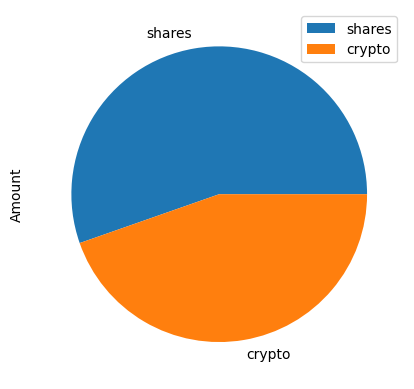

In [46]:
# Plot savings pie chart
df_savings.plot(kind='pie',y='Amount')

In [85]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = shares + crypto

# Validate saving health
if savings>emergency_fund:
    print(f"Congratulations!You have Enough Fund to support emergency"),
else:
    print(f"Not Enough Fund for Emergency. Need to save additional {emergency_fund -savings}")

Not Enough Fund for Emergency. Need to save additional 136638.29200000002


In [86]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [50]:
# Get 5 years' worth of historical data for SPY and AGG

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
# Get current closing prices for SPY and AGG
df_portfolio_5Y = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Reorganize the DataFrame
df_portfolio_5Y

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG
...,...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,417.44,418.2200,416.8111,417.610,51824860,295870,417.508245,SPY
2021-04-27 04:00:00+00:00,417.93,418.1400,416.3000,417.520,50297139,296300,417.481360,SPY
2021-04-28 04:00:00+00:00,417.81,419.0100,416.9000,417.400,50692781,330049,417.742098,SPY


In [51]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio_5Y[df_portfolio_5Y['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio_5Y[df_portfolio_5Y['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY],axis =1, keys = ['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [53]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 100

MC_AGG = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)
MC_AGG

In [54]:
# Printing the simulation input data
MC_AGG.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [94]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_AGG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008081,0.996479,1.004071,1.000895,0.991300,1.008297,1.008601,0.997709,1.004957,1.003943,...,0.994517,0.996810,1.001261,1.006086,1.013305,0.994896,0.994562,1.003467,1.001000,0.992074
2,1.000663,1.006331,1.006992,1.008925,0.989657,1.007027,1.014721,1.001679,1.000231,1.004762,...,0.989032,0.999506,1.006185,1.008171,1.017018,0.977300,0.997010,1.014264,0.988538,1.000063
3,1.014706,1.003083,1.001780,1.004614,0.986842,1.009349,1.012237,1.004929,0.996078,1.008280,...,0.979783,1.004868,1.001701,0.992014,1.014109,0.972172,0.995280,1.012557,0.980138,1.009981
4,1.019042,1.005254,1.003032,1.003575,0.976415,1.009386,1.011077,1.007259,1.005567,1.003915,...,0.971767,1.009328,1.002708,0.987945,1.018450,0.974236,1.000680,1.019013,0.972362,1.005280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.617121,12.673109,12.691348,3.481148,27.864810,19.514583,12.691748,5.332553,7.717572,13.813075,...,14.750780,12.947612,8.655083,5.895528,12.413494,8.401396,6.176818,4.784521,9.492424,23.824845
7557,15.548698,12.807000,12.653649,3.486748,27.791252,19.566321,12.749792,5.258433,7.784711,13.722226,...,14.812678,12.933351,8.686644,5.883474,12.445987,8.411159,6.163167,4.804553,9.441337,23.914081
7558,15.522036,12.819824,12.637325,3.491701,27.685744,19.613418,12.522925,5.259241,7.783587,13.681678,...,14.718282,12.958702,8.758623,5.921709,12.405289,8.392335,6.210057,4.850294,9.514277,23.797134
7559,15.466902,12.750705,12.690368,3.483444,27.795846,19.440899,12.468211,5.259021,7.766227,13.686777,...,14.676560,13.060869,8.751687,5.910105,12.349614,8.428341,6.228513,4.810256,9.529638,23.769869


In [100]:
# definging a veriable for the return
simulated_returns = MC_AGG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

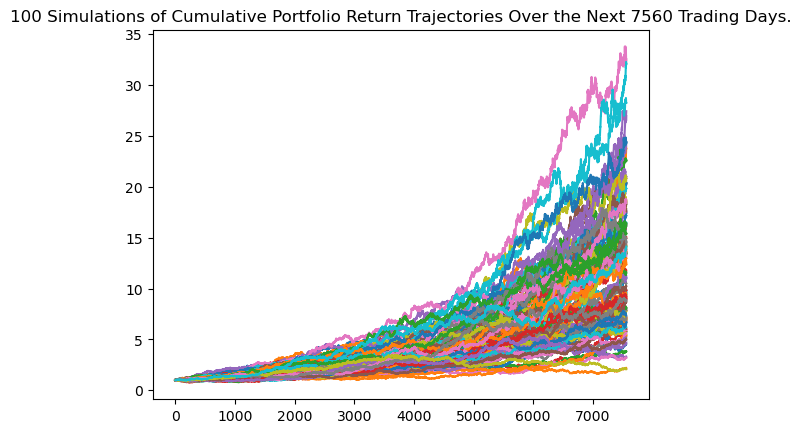

In [89]:
# Plot simulation outcomes
MC_AGG.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

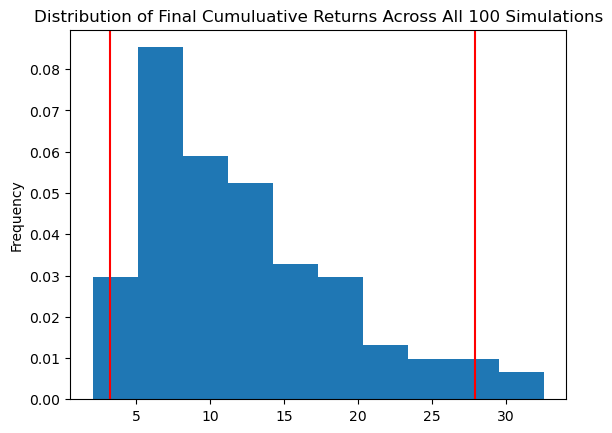

In [90]:
# Plot distribution of outcomes
MC_AGG.plot_distribution()

In [126]:
# Set initial investment
initial_investment = 20000

# Compute summary statistics from the simulated daily returns
# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * simulated_return
cumulative_pnl.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
1,19876.817444,20050.877263,19995.926335,20036.551636,19972.275370,20126.650579,20146.142610,20042.383294,19961.560850,19914.999422,...,20075.582871,19992.749497,20065.476533,20293.389908,19981.282342,20024.259934,20066.235420,20112.949284,20094.427544,19979.356851
2,20102.771501,19881.049016,20055.311233,20019.920048,20046.059737,20255.290547,20174.916991,20081.735852,20024.006403,19817.408139,...,19945.528749,19990.076927,20000.810146,20154.716976,20084.989630,20104.378317,19993.319736,20108.898500,20033.797140,19912.964692
3,20070.004545,19881.279710,19976.413490,19968.761921,20208.799709,20144.607678,20286.909585,19997.648824,20179.964127,19848.591272,...,20049.140967,20195.776863,20194.125893,20286.032803,19806.438355,20091.088511,19902.808819,19912.490665,19959.364720,19931.968760
4,19900.319573,19771.493870,19947.162838,19731.915079,20336.178371,20254.266241,20259.356824,19965.596741,20183.447862,19829.507222,...,20019.742642,19956.495247,20057.154740,20410.344421,19896.781030,19939.723938,19875.079898,19996.158621,20058.357715,20029.364884


In [122]:
#Summary of simulated returns 
summary = MC_AGG.summarize_cumulative_return()

C:\Users\muhas\Downloads\Module-5-Challenge-Financial-Planner\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           100.000000
mean             10.435392
std               4.535674
min               3.766089
25%               6.831092
50%               9.468005
75%              13.012490
max              23.353658
95% CI Lower      4.602184
95% CI Upper     20.808024
Name: 7560, dtype: float64

In [130]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 year will end within in the range of $92043.67 and $416160.47.
